  **ONLINE** **SHOPPERS PURCHASING INTENSION DATASET**


**DATASET INFORMATION:**

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

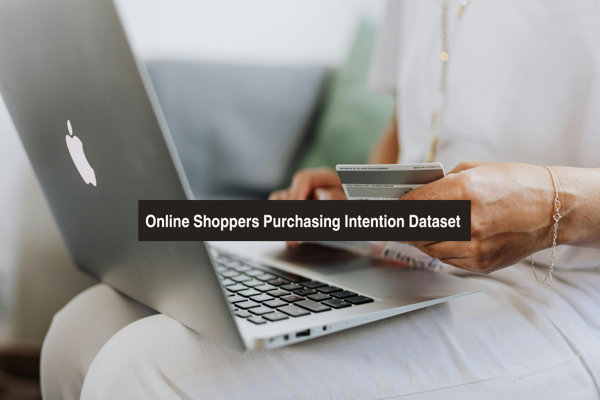

In [ ]:
from PIL import Image
from IPython.display import display

image = Image.open("/content/online.png")
image = image.resize((600, 400))
display(image)

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

In [ ]:
#load the dataset
data=pd.read_csv("/content/online_shoppers_intention.csv")
#convert it into dataframe
df=pd.DataFrame(data)

**INFORMATION**

This method gives you a concise summary of the DataFrame, including:
* Number of entries (rows)
* Column names and data types
* Number of non-null values per column
* Memory usage  

In [ ]:
#gathering information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**STRUCTRE**

* It gives the information about rows and columns
* Example: (Rows,columns)




In [ ]:
#Finding the shape of the dataset
df.shape

(12330, 18)

**COLUMNS**

It helps to separately list down the columns alone

In [ ]:
#Finding the columns of the dataset
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

**DESCRIBE**

It is a handy pandas method to get a quick statistical summary of your DataFrame's numeric columns.

In [ ]:
#Statistical summary
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**MISSING VALUES**

When working with datasets, it's important to know if any values are missing (NaN, None) so you can decide how to handle them.

In [ ]:
#checking missing values
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**DUPLICATES**

df.duplicated() is a command used to detect the presence of duplicate values
*   True → The row is a duplicate of a previous row
*  False → The row is unique



In [ ]:
#Checking Duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


df.duplicated().sum() is a quick and powerful way to count the number of duplicate rows in your DataFrame.

In [ ]:
#To find the number of duplicate rows
df.duplicated().sum()

np.int64(125)

Duplicates are removed from the dataset for the better performance of the model

In [ ]:
#Eliminating the duplicates
df.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Information of the dataset after eluminating the duplicates


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Showcasing the first and last 50 data from the dataset

In [ ]:
#prefix data
df.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
#suffix data
df.tail(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12280,1,73.750000,0,0.000000,45,2674.339216,0.000870,0.020139,0.000000,0.0,Nov,1,1,8,1,Returning_Visitor,False,False
12281,1,88.000000,3,540.333333,57,1656.410714,0.000000,0.002260,0.000000,0.0,Nov,2,4,9,3,Returning_Visitor,False,False
12282,0,0.000000,0,0.000000,125,7453.766667,0.001626,0.013132,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
12283,0,0.000000,0,0.000000,37,854.550000,0.005405,0.023166,0.000000,0.0,Dec,2,2,6,3,Returning_Visitor,False,False
12284,0,0.000000,0,0.000000,45,2650.416667,0.013333,0.034074,0.000000,0.0,Dec,3,7,2,1,Returning_Visitor,True,False
12285,6,369.333333,2,225.500000,133,3918.363736,0.000000,0.009275,7.147604,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
12286,0,0.000000,0,0.000000,4,197.416667,0.016667,0.087500,0.000000,0.0,Nov,4,1,5,1,Returning_Visitor,False,False
12287,8,167.910714,6,547.750000,111,6340.152381,0.003361,0.009432,44.219794,0.0,Dec,3,2,6,2,Returning_Visitor,False,False
12288,3,100.000000,0,0.000000,27,730.791667,0.016000,0.027556,0.000000,0.0,Nov,3,2,3,11,Returning_Visitor,False,False
12289,0,0.000000,0,0.000000,3,88.500000,0.000000,0.033333,0.000000,0.0,Nov,3,2,1,3,Returning_Visitor,True,False


**OUTLIERS**

Outliers are data points that deviate significantly from the rest of your dataset which may cause degradation in the performance of the model



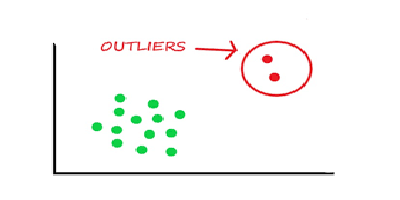

In [ ]:
image = Image.open("/content/outlier.png")
image = image.resize((400, 200))
display(image)

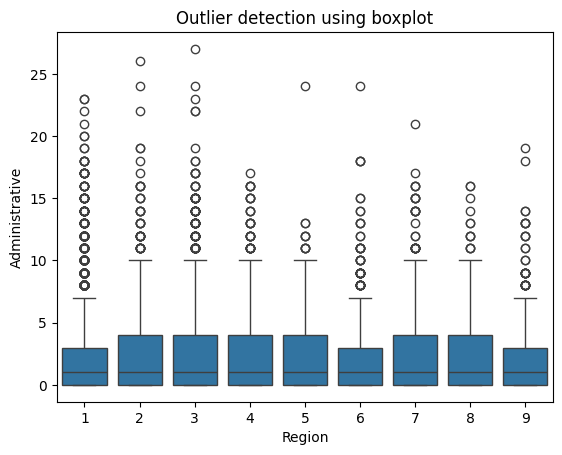

In [ ]:
#Handling outliers using boxplot
sns.boxplot(x='Region',y='Administrative',data=df)
plt.title("Outlier detection using boxplot")
plt.show()





* Outliers are extreme values that differ significantly from other observations in your dataset. Removing them can improve the quality of your analysis and machine learning models.
*  IQR (Interquartile Range) is the range between the 25th and 75th percentiles of your data.
Think of it as the middle 50% of the data — where most of your data points lie.





In [107]:
#Removing outliers using IQR
# For Administrative
Q1_a = df['Administrative'].quantile(0.25)
Q3_a = df['Administrative'].quantile(0.75)
IQR_a = Q3_a - Q1_a

# For Region
Q1_r = df['Region'].quantile(0.25)
Q3_r = df['Region'].quantile(0.75)
IQR_r = Q3_r - Q1_r

# Filter both
df = df[
    (df['Administrative'] >= Q1_a - 1.5 * IQR_a) & (df['Administrative'] <= Q3_a + 1.5 * IQR_a) &
    (df['Region'] >= Q1_r - 1.5 * IQR_r) & (df['Region'] <= Q3_r + 1.5 * IQR_r)
]


shape of the dataset after the elimination of Outliers

In [108]:
#shape of the dataset after removing outliers
df.shape

(8760, 18)

**ENCODING**

Encoding is the process of converting categorical data into numerical values so that machine learning models can use them.

In [109]:
#Encoding using labelencoder
y=-df['Revenue']
x=df.drop('Revenue',axis=1)
x.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [110]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 1, 1])

**VISUALIZATION**

Data visualization is the process of graphically representing data to make it easier to understand, interpret, and draw insights from.



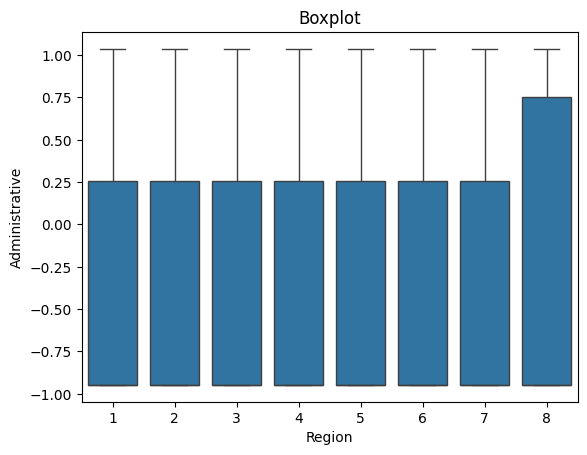

In [111]:
#Visualization
#Boxplot
sns.boxplot(x='Region',y='Administrative',data=df)
plt.title("Boxplot")
plt.show()

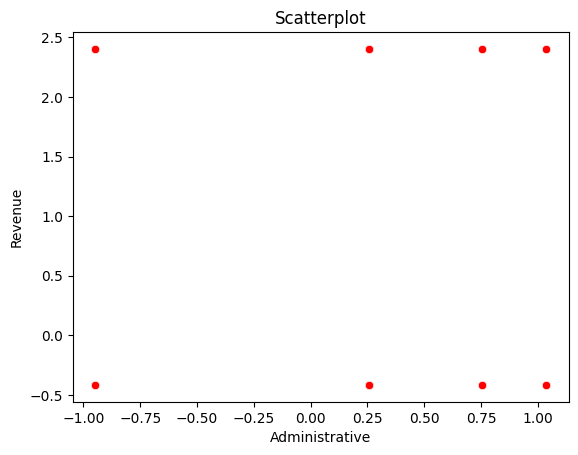

In [112]:
#Scatterplot
sns.scatterplot(x='Administrative',y='Revenue',data=df,color='r')
plt.title("Scatterplot")
plt.show()

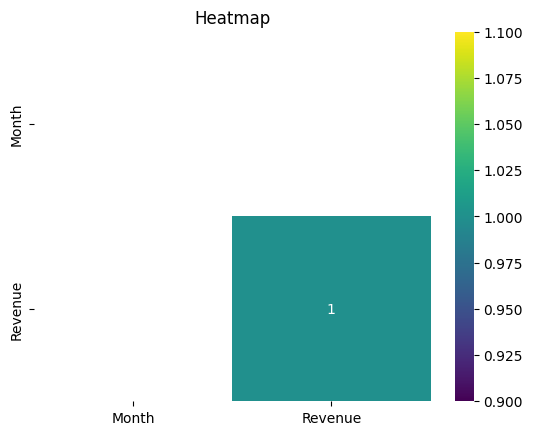

In [113]:
#Heatmap
month_mapping={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,
               'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Month']=df['Month'].map(month_mapping)
correlation_matrix=df[['Month','Revenue']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='viridis')
plt.title("Heatmap")
plt.show()

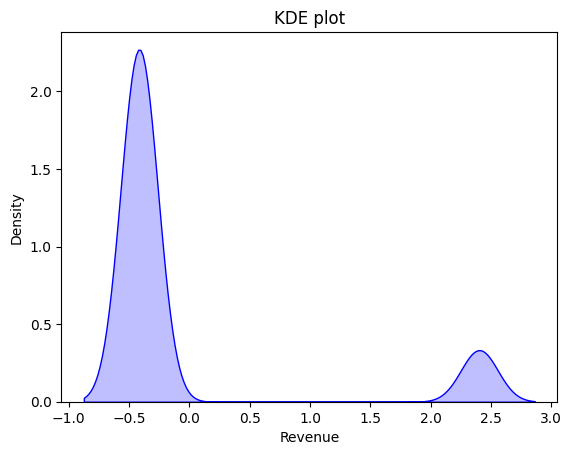

In [114]:
#KDE plot
df['Revenue']=df['Revenue'].replace({'\$':'',',':''},regex=True).astype(float)
sns.kdeplot(df['Revenue'],fill=True,color='b')
plt.title("KDE plot")
plt.show()

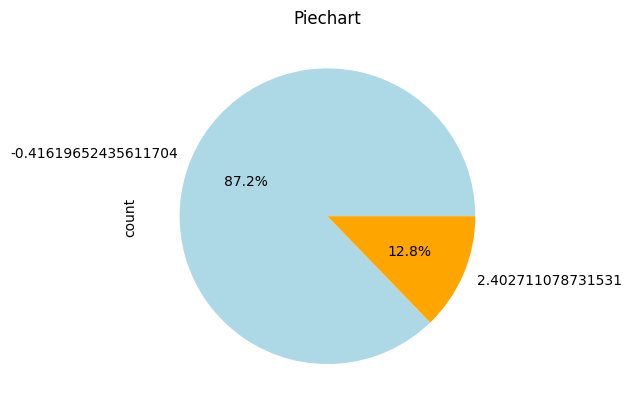

In [115]:
#Piechart
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['lightblue','orange'])
plt.title("Piechart")
plt.show()


**SKEW**

*  Skewness measures the asymmetry of a data distribution.
In simple terms: it tells you how "tilted" your data is.
*  If the skew is left tilted it reflects that the mean in less than the median or if the skew is right tilted it means that the mean is greater than the median



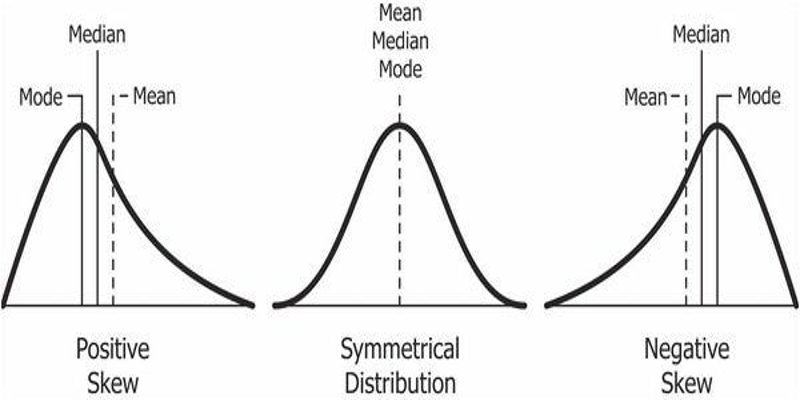

In [116]:
image = Image.open("/content/skew.jpg")
image = image.resize((800, 400))
display(image)

In [117]:
#Measuring Skewness
numeric_df = df.select_dtypes(include=np.number)
numeric_df.skew()

,0
Administrative,0.726633
Administrative_Duration,0.795195
Informational,2.078990
Informational_Duration,2.284939
ProductRelated,0.005680
ProductRelated_Duration,-0.108544
BounceRates,0.839220
ExitRates,0.236311
PageValues,1.969965
SpecialDay,2.348167


PURPOSE OF REMOVING SKEW:


* Many models (like linear regression, logistic regression, SVM) perform better when features are normally distributed.
* Skewed distributions often include extreme values that can dominate training. Removing skew reduces this impact.



In [118]:
#Removing skewness
from sklearn.preprocessing import PowerTransformer
import numpy as np
numeric_df = df.select_dtypes(include=['number'])
skewed_cols = numeric_df.columns[numeric_df.skew().abs() > 1]
for col in skewed_cols:
    if col in df.columns:
        df[col] = np.log1p(df[col]) if (df[col] > 0).all() else PowerTransformer(method='yeo-johnson').fit_transform(df[[col]])

print("Skewness After Transformation:\n", df[skewed_cols].skew())

Skewness After Transformation:
 Informational             2.077275
Informational_Duration    2.279269
PageValues                1.955850
SpecialDay                2.347817
Browser                   0.809903
Revenue                   2.230823
dtype: float64


**FEATURE SELECTION**


* Feature selection is the process of choosing the most important variables (features) in your dataset that actually help your model learn and predict better
* Instead of using all columns, you select only the most relevant ones.



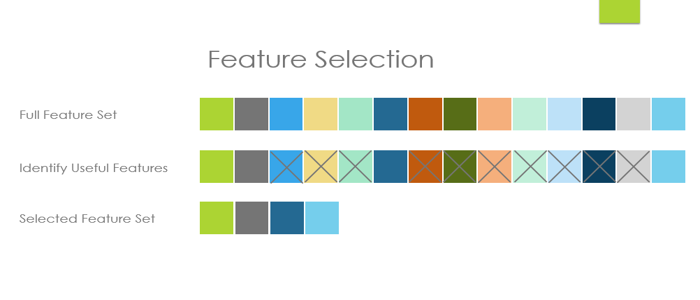

In [ ]:
image = Image.open("/content/fs.png")
image = image.resize((700, 300))
display(image)

In [124]:
#Feature selection using SelectKBest
x=df.drop(columns='Revenue',axis=1)
y=df['Revenue']

# Get numerical and categorical features based on the current x DataFrame
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(exclude=['object']).columns

# Impute NaN values in numerical features with the mean
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
x_numerical = num_imputer.fit_transform(x[numerical_features])

# Impute NaN values in categorical features with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
x_categorical = cat_imputer.fit_transform(x[categorical_features])

# Create DataFrames for transformed numerical and categorical features
x_numerical_df = pd.DataFrame(x_numerical, columns=num_imputer.get_feature_names_out(numerical_features), index=x.index)
x_categorical_df = pd.DataFrame(x_categorical, columns=cat_imputer.get_feature_names_out(categorical_features), index=x.index)

# Concatenate the transformed DataFrames
x = pd.concat([x_numerical_df, x_categorical_df], axis=1)

# Define transformers
categorical_transformer=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
numerical_transformer='passthrough'

# ***Update ColumnTransformer to use the columns of the transformed DataFrame (x)***
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer, x.select_dtypes(exclude=['object']).columns), # Use updated numerical columns from x
        ('cat',categorical_transformer, x.select_dtypes(include=['object']).columns) # Use updated categorical columns from x
    ]
)

x_encoded=preprocessor.fit_transform(x)
x_encoded_df=pd.DataFrame(x_encoded,columns=preprocessor.get_feature_names_out())
selecter=SelectKBest(score_func=f_classif,k=4)
x_new=selecter.fit_transform(x_encoded_df,y)
selected_features=x_encoded_df.columns[selecter.get_support()]
feature_score=pd.DataFrame({'features':x_encoded_df.columns,'score':selecter.scores_}).sort_values(by='score',ascending=False)

print("Selected features")
print(selected_features)
print("\nFeature scores")
print(feature_score)

Selected features
Index(['num__ProductRelated', 'num__ProductRelated_Duration', 'num__ExitRates',
       'num__PageValues'],
      dtype='object')

Feature scores
                              features        score
8                      num__PageValues  7686.865088
7                       num__ExitRates   655.759153
5         num__ProductRelated_Duration   368.182446
4                  num__ProductRelated   311.439989
6                     num__BounceRates   306.021508
15        cat__VisitorType_New_Visitor   206.571794
0                  num__Administrative   192.838763
17  cat__VisitorType_Returning_Visitor   191.773609
1         num__Administrative_Duration   187.959726
2                   num__Informational    88.650048
3          num__Informational_Duration    85.858890
9                      num__SpecialDay    59.080140
14                        num__Weekend    13.250093
10               num__OperatingSystems     6.586951
16              cat__VisitorType_Other     4.262164
11   

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


**DATA SPLIT**

train_test_split is a method used to split your dataset into two (or more) parts:
1. Training set → used to train the model
2. Testing set → used to evaluate how well the model performs on unseen data


train_test_split helps you train your model on one part of your data and test it on another to make sure it performs well in the real world.


In [126]:
#Split data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_encoded_df,y,test_size=0.2,random_state=42)

**SCALING**
* Scaling means changing the numbers in your data so that they are all in a similar range — like from 0 to 1, or centered around 0.

* It helps make all features equally important by bringing them to the same level.



In [127]:
#scaling
Ss=StandardScaler()
x_test_scaled=Ss.fit_transform(x_test)
x_train_scaled=Ss.fit_transform(x_train)

**CLASSIFICATION**

* Classification is when a machine learning model learns how to put things into categories (or "classes").
* It is like teaching a computer to answer a yes/no or multiple-choice question based on the data.




In [128]:
#classification
classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'RFC':RandomForestClassifier()
}

**EVALUATING THE MODEL PERFORMANCE**

1. Model performance tells us how good or bad a machine learning model is at making predictions.
2. Model performance helps you check if your model is making the right predictions, and tells you how to improve it if not.



In [129]:
#Evaluate the model performance
y_train_discrete = (y_train > 0).astype(int)
y_test_discrete = (y_test > 0).astype(int)
for name,clf in classifiers.items():
    clf.fit(x_train_scaled,y_train_discrete) # Use the discrete target for training
    y_pred=clf.predict(x_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:",accuracy_score(y_test_discrete,y_pred)) # Use the discrete target for evaluation
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_discrete,y_pred))
    print("\nClassification Report:")


Logistic Regression Results:
Accuracy: 0.9212328767123288

Confusion Matrix:
[[1452   65]
 [  73  162]]

Classification Report:

Decision Tree Results:
Accuracy: 0.8698630136986302

Confusion Matrix:
[[1407  110]
 [ 118  117]]

Classification Report:

SVM Results:
Accuracy: 0.920662100456621

Confusion Matrix:
[[1459   58]
 [  81  154]]

Classification Report:

RFC Results:
Accuracy: 0.8784246575342466

Confusion Matrix:
[[1516    1]
 [ 212   23]]

Classification Report:
